In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
datos = pd.read_csv('Iris.csv')
datos.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = datos[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = datos['Species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [23]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con k={k}: {accuracy*100:.2f}%")

Precisión del modelo con k=3: 100.00%


In [31]:
print("Reporte de clasificación\n", classification_report(y_test, y_pred))

Reporte de clasificación
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



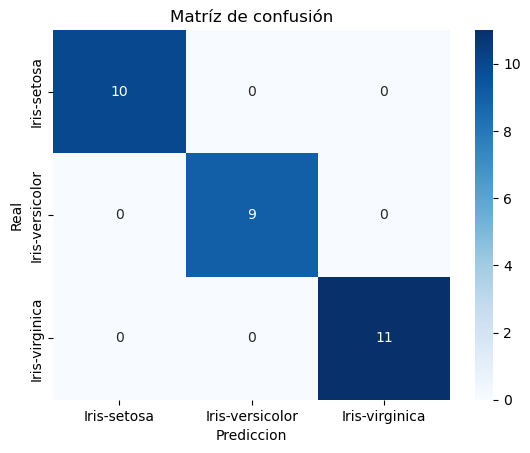

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt = "d",
            xticklabels=datos['Species'].unique(), yticklabels = datos['Species'].unique())
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matríz de confusión")
plt.show()